# Deep Nets with Keras

In [another notebook](https://notebooks.azure.com/jrnorton11/libraries/NeuralNetworksAndDeepLearning/html/CNNsWithTensorFlowAndKeras.ipynb), we programmed up a Convolutional Neural Network (CNN) with TensorFlow and Keras.  Noting that one of the courses on Udemy that gets into Machine Learning only presents their Python code with Keras, I decided to code up as many Deep Nets as I can just to really get to know Keras much better.  To me, it seemed like there are some definite advantages to using Keras:
* Simpler interface.  This is both conceptual and operational
    * Conceptual - We don't have to deal with graphs and sessions and that seems nice.
    * Operational - The interface is more terse which is sometimes problematic, but the output is far nicer.
    * Disadvantage - I'm not sure how to show the net topology with Keras - that will be a point of investigation.
* Faster - I don't know why, but Keras worked far faster for me than TensorFlow.
* Customizable - Choose your [backend](https://keras.io/backend/).  You can choose to run on TensorFlow, Theano, or CNTK from Microsoft.

Let's get started!

# ANN - Artificial Neural Network

The following network is an Artificial Neural Network which we will use for classification.  The original network is from Udemy, but we are going to work with the data from the University of Wisconsin breast cancer study.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data Preprocessing

In [ ]:
# Import the data set
dataset = pd.read_csv("datasets/breast-cancer-wisconsin-data.csv")

# Isolate the $independent and dependent values.
X = dataset.iloc[:, 2:32]
y = dataset.iloc[:, 1]

## Encoding categorical data

At this point, we should encode categorical data for independent variables.  This data set doesn't have any.  But the code is listed below for completeness.
```python
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
```
We should encode y.

### Hot Encoding

OK - what is "hot encoding"?  You should know this in case it comes up in a job interview question like it did with me.  Let's start with the one-dimensional categorical variable, True and False.  Note that True and False are not numbers - doh!  We need numbers.  As is normally done, we assign True as one and False as zero.

But what happens if we have more than two categorical variables?  The wrong answer is to assign values \[0, 0.5, 1\] for three, \[0, 0.33, 0.66, 1\] for four, etc.  This artificially assigns importance - we are essential turning categorical values into continuous values (as the number of categories approaches infinity).  We note that in some cases, this approach may be ok - e.g., cold, warm, hot.  But in general it is not.

But what if the labels are independent - that is, there is no ordinal relationship.  Consider "dog" and "cat".  Rather than take the first approach (an index), hot encoding approaches the problem as a probabalistic solution.  Let's create a probability table for "dog" and "cat" where what the animal actually is in the rows and the assign probability is in the columns:

|     | Dog | Cat |
| --- | --- | --- |
| Dog |  1  |  0  |
| Cat |  0  |  1  |


*In these cases, we would like to give the network more expressive power to learn a probability-like number for each possible label value. This can help in both making the problem easier for the network to model. When a one hot encoding is used for the output variable, it may offer a more nuanced set of predictions than a single label.* [Brownlee](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)

Hot Encoding, instead of assigning a single value to a categorical variable, we assign a vector.  For example, for RGB, we can assign R = \[1 0 0\], G = \[0 1 0\], and B = \[0 0 1\].

## Split Data

Split the data into testing and training sets.  We use the same ratio as before because we are going to characterize the methods.

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import random as rn

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/keras-team/keras/issues/2280#issuecomment-306959926

import os
os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(12345)

## Create the ANN

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 23, activation = 'relu', input_dim = X_train.shape[1], kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(units = 16, activation = 'relu', kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Keras Model Visualization**

This is how you visualize a network in Keras - that was an unanswered question.

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file="tmp/ann.png", show_shapes=True, show_layer_names=True)

import time
time.sleep(1)

<img src="tmp/ann.png">

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.fit_transform(y_test)

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Also convert y_test
y_test = (y_test > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

The confusion matrix results are pretty impressive and as we see below, the area under the curve (AUC) is also very good (0.96).  However, this wasn't any better than what we got with our logistic regression model.  I won't pass judgement yet however on any of these approaches.  A number of models should be tested.

In [ ]:
from sklearn import linear_model
from sklearn import metrics

y_testv = pd.Series(y_test.flatten())
y_predv = pd.Series(y_pred.flatten())
y_testv = np.asarray(y_testv.replace('B', 0).replace('M', 1))
y_predv = np.asarray(y_predv.replace('B', 0).replace('M', 1))
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_testv, y_predv)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Recurrent Neural Networks (RNNs)

Recurrent neural networks, or RNNs ([Rumelhart](https://www.iro.umontreal.ca/~vincentp/ift3395/lectures/backprop_old.pdf)), are a family of neural networks which can process sequential data represented as a sequence of values $x^{(1)}, ... , x^{(\tau)}$. Recurrent networks can scale to much longer sequences than would be practical for networks without sequence-based specialization. Most recurrent networks can also process sequences of variable length.

To go from multilayer networks to recurrent networks, RNNs share parameters across diﬀerent parts of the model. Parameter sharing makes it possible to extend and apply the model to examples of diﬀerent forms (diﬀerent lengths, here) and generalize across them. If there is a separate parameter for each value of the time index, it would not be possible to generalize to sequence lengths not seen during training, nor share statistical strength across diﬀerent sequence lengths and across diﬀerent positions in time. Such sharing is particularly important when a speciﬁc piece of information can occur at multiple positions within the sequence.

Suppose we train a feedforward network that processes sentences of ﬁxed length. A traditional fully connected feedforward network would have separate parameters for each input feature - it needs to learn all the rules of the language separately at each position in the sentence. By comparison, a recurrent neural network shares the same weights across several time steps. 
In recurrent networks, each member of the output is a function of the previous members of the output. Each member of the output is produced using the same update rule applied to the previous outputs. This recurrent formulation results in the sharing of parameters through a very deep computational graph ([Adopted from the Deep Learning Book.](http://www.deeplearningbook.org/contents/rnn.html)). Sharing parameters in this fashion gives RNNs “memory” which captures information about what has been calculated so far. In theory RNNs can make use of information in arbitrarily long sequences, but in practice they are limited to looking back only a few steps.

## Unfolding a Graph

![](http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg)

Unfold a recursive or recurrent computation into a computational graph that has a repetitive structure, typically corresponding to a chain of events.  Unfolding this graph results in the sharing of parameters across a deep network structure. By unfolding or unrolling we simply mean that we write out the network for the complete sequence. For example, if the sequence we care about is a sentence of 5 words, the network would be unrolled into a 5-layer neural network, one layer for each word. The formulas that govern the computation happening in a RNN are as follows:

* $x_t$ is the input at time step $t$. For example, $x_1$ could be a one-hot vector corresponding to the second word of a sentence.  
* $s_t$ is the hidden state at time step $t$. It’s the “memory” of the network. $s_t$ is calculated based on the previous hidden state and the input at the current step: $s_t=f(Ux_t + Ws_{t-1})$. The function f usually is a nonlinearity such as tanh or ReLU.  $s_{-1}$, which is required to calculate the first hidden state, is typically initialized to all zeroes.  
* $o_t$ is the output at step $t$. For example, if we wanted to predict the next word in a sentence it would be a vector of probabilities across our vocabulary. $o_t = \mathrm{softmax}(Vs_t)$.

Note:

* You can think of the hidden state $s_t$ as the memory of the network. $s_t$ captures information about what happened in all the previous time steps. The output at step $o_t$ is calculated solely based on the memory at time $t$. As briefly mentioned above, it’s a bit more complicated  in practice because $s_t$ typically can’t capture information from too many time steps ago.  
* Unlike a traditional deep neural network, which uses different parameters at each layer, a RNN shares the same parameters ($U$, $V$, $W$ above) across all steps. This reflects the fact that we are performing the same task at each step, just with different inputs. This greatly reduces the total number of parameters we need to learn.

* The above diagram has outputs at each time step, but depending on the task this may not be necessary. For example, when predicting the sentiment of a sentence we may only care about the final output, not the sentiment after each word. Similarly, we may not need inputs at each time step. The main feature of an RNN is its hidden state, which captures some information about a sequence.

## What can RNNs do?

* Language Modeling and Generating Texts  
* Language Translation .
* Speech Recognition
* Generating Image Descriptions


See http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/.



### More References
**Recurrent Neural Networks**

Brilliant.  Recurrent Neural Network.  https://brilliant.org/wiki/recurrent-neural-network/  
Goodfellow et al.  Deep Learning Book.  http://www.deeplearningbook.org/contents/rnn.html  
Andrej Karpathy.  The Unreasonable Effectiveness of Recurrent Neural Networks.  http://karpathy.github.io/2015/05/21/rnn-effectiveness/  
Victor Schmidt.  Keras recurrent tutorial.  https://github.com/Vict0rSch/deep_learning/tree/master/keras/recurrent  
Dataset - https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#  

**Keras**
Francois Chollet.  Keras Resources.  https://github.com/fchollet/keras-resources.  

# LSTM

I really like Jason Brownlee's blogs.  Let's start with his [blog on RNNs](https://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/) and some other material that I found in trying to come to a better understanding of LSTMs.  LSTMs are a form of an RNN - or perhaps better said, a network of LSTMs is a type of RNN.

LSTM stands for 'long short-term model'.  It is widely used because the architecture overcomes the vanishing and exposing gradient problem that plagues all recurrent neural networks, allowing very large and very deep networks to be created.

Like other recurrent neural networks, LSTM networks maintain state. Let's determine exactly how state is maintained in LSTM networks by the Keras deep learning library.

### Understanding the Vanishing Gradient

For reference, use the paper by [Pascanu et al](http://proceedings.mlr.press/v28/pascanu13.pdf).  The following is the summary of [this statsexchange blog](https://stats.stackexchange.com/questions/185639/how-does-lstm-prevent-the-vanishing-gradient-problem).

In one-dimension, assume we have a hidden state $h_t$ at time step $t$. To simplify, remove biases and inputs.  Then for the output from a node or neuron, we have

$h_t = \sigma(w h_{t-1})$

It can be shown ([see around page 12 of this thesis](https://d-nb.info/1082034037/34)) that

$
\begin{align}
\frac{\partial h_{t'}}{\partial h_t} 
&= \prod_{k=1}^{t' - t} w \sigma'(w h_{t'-k})\\
&= \underbrace{w^{t' - t}}_{!!!}\prod_{k=1}^{t' - t} \sigma'(w h_{t'-k})
\end{align}
$

Note that the term marked with the exclamation marks is the critical term.  If the term is less than one, then the gradient decays to zero and if the term is greater than one, then the gradient will grow exponentially fast.

In LSTMs, you have the cell state $s_t$. The derivative there is of the form

$\frac{\partial s_{t'}}{\partial s_t} = \prod_{k=1}^{t' - t} \sigma(v_{t+k})$

where $v_t$ is the input to the forget gate. There is no exponentially fast decaying factor involved. Consequently, there is at least one path where the gradient does not vanish. See the [thesis](https://d-nb.info/1082034037/34) for the complete derivation.

### Cell States

According to [Colah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/), cell states are the key to understanding LSTMs. In particular, cell states are like a conveyor belt.  In the following picture of a node,

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-C-line.png" alt="LSTM node" style="width:800px;"/>

the horizontal line is the "conveyor belt".  It is easy for the information to flow through unchanged.  It runs through the entire network with minor linear interactions.

Information can be removed or added from the LSTM, carefully regulated by structures called gates.

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-gate.png" alt="LSTM gate" style="width:180px;"/>

Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.  Recall that the sigmoid is:

$S(x) = \frac{1}{1+e^{-x}}$

and looks like

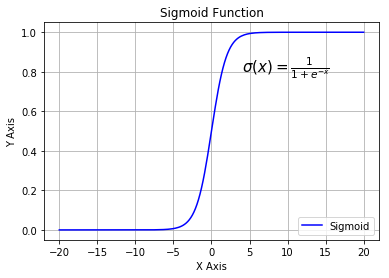

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sigmoid = lambda x: 1 / (1 + np.exp(-x))
x=np.linspace(-20,20,200)
plt.plot(x,sigmoid(x),'b', label='Sigmoid')
plt.grid()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.text(4,0.8,r'$\sigma(x)=\frac{1}{1+e^{-x}}$',fontsize=15)
plt.legend(loc='lower right')

The sigmoid layer outputs numbers between zero and one, describing how much of each component should be let through. A value of zero filters all the signal, one filters none of the signal.

The forget LSTM (from [1997](http://www.bioinf.jku.at/publications/older/2604.pdf)) has three of these gates, to protect and control the cell state: the input, forget, and output gate.

<img src="images/LSTM_97.PNG" style="width:600px;"\>

In more detail, the $j^{th}$ *memory cell* in an LSTM is denoted $c_j$. The memory cell is built around a *CEC* or Constant Error Carrousel.  The CEC (extracted from the picture above below):

<img src="images/CEC_1997.PNG" style="width=100px;"\>

does not suffer from decaying or exploding gradients because the multiplier is 1.0.

$S_c$ is the current state of the memory cell, and $g y^{in}$ is the current input to it. The triple arrows on the left show where information flows into the cell at multiple points.  That combination of present input ($x_t$) and past cell state ($h_{t-1}$) is fed not only to the cell itself, but also to each of its three gates, which will decide how the input will be handled.  That decision is determined by the cell state $S_{c-1}$, e.g., 0 - ignore, 1 - accept.

The gates determine whether to let new input in, erase the present cell state, and/or let that state impact the network’s output at the present time step.  For example, once the input comes in, the sigmoid layer called the "forget gate layer" decides what to throw away.  Each gate can be open or shut, and they will recombine their open and shut states at each step. The cell can forget its state, or not; be written to, or not; and be read from, or not, at each time step, and those flows are represented here.

## LSTM Problem - Learn the Alphabet

This one comes from [Jason Brownlee](https://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/).  We will compare a number of different LSTM approaches; the context of these comparisons will be a simple sequence prediction problem of learning the alphabet. That is, given a letter of the alphabet, predict the next letter of the alphabet.

This is a simple sequence prediction problem that once understood can be generalized to other sequence prediction problems like time series prediction and sequence classification.

In [ ]:
import numpy as np

# fix random seed for reproducibility
np.random.seed(7)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils


Neural networks model numbers - map the letters of the alphabet to integer values. This can be done by creating a dictionary (map) of the letter index to the character. Also create a reverse lookup for converting predictions back into characters to be used later.

In [ ]:
# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

# prepare the dataset of input to output pairs encoded as integers
seq_length = 1
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
	print(seq_in, '->', seq_out)

We need to reshape the NumPy array into a format expected by the LSTM networks, that is \[samples, time steps, features\]. Once reshaped, normalize the input integers to the range 0-to-1, the range of the sigmoid activation functions used by the LSTM network.

Consider this problem as a sequence classification task, where each of the 26 letters represents a different class. As such, we can convert the output (y) to a *one hot encoding*, using the Keras built-in function to_categorical().  Recall that the one hot encode will give us 26 vectors of 26 numbers which in this case look like the identity matrix.

In [ ]:
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (len(dataX), seq_length, 1))
# normalize
X = X / float(len(alphabet))

# one hot encode the output variable
y = np_utils.to_categorical(dataY)
print(y)

With the alphabet properly encoded, we are prepared to compare LSTM models.

### Naive LSTM for Learning One-Char to One-Char Mapping

Design a simple LSTM to learn how to predict the next character in the alphabet given the context of just one character.
Frame the problem as a random collection of one-letter input to one-letter output pairs. It turns out that this is a difficult framing of the problem for the LSTM to learn.

Define an LSTM network with 32 units and an output layer with a softmax activation function for making predictions. Because this is a multi-class classification problem, we can use the log loss function (called “categorical_crossentropy” in Keras), and optimize the network using the ADAM optimization function.

The model is fit over 500 epochs with a batch size of 1.

In [ ]:
# create and fit the model
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=1, verbose=0)

In [ ]:
# summarize the performance on the entire training dataset.
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

Re-run the training data through the network and generate predictions, converting both the input and output pairs back into their original character format to get a visual idea of how well the network learned the problem.

In [ ]:
# demonstrate some model predictions
for pattern in dataX:
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)

# demonstrate some model predictions
for pattern in dataX:
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)

Why is this problem difficult for the LSTM to learn?

The reason is that the LSTM units do not have any context to work with. Each input-output pattern is shown to the network in a random order and the state of the network is reset after each pattern (each batch where each batch contains one pattern).

This is abuse of the LSTM network architecture, treating it like a standard multilayer Perceptron.  Try a different framing of the problem in order to provide more sequence to the network from which to learn.

### Naive LSTM for a Three-Char Feature Window to One-Char Mapping
A popular approach to adding more context to data for multilayer Perceptrons is to use the window method.
The window method uses previous steps in the sequence to provide additional input features to the network. 
Here, we increase the sequence length from 1 to 3, for example.

ABC => D  
BCD => E  
etc.

Each element in the sequence is then provided as a new input feature to the network. This requires a modification of how the input sequences reshaped in the data preparation step:
It also requires a modification for how the sample patterns are reshaped when demonstrating predictions from the model.

In [ ]:
# Naive LSTM to learn three-char window to one-char mapping
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# fix random seed for reproducibility
np.random.seed(7)

# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

# prepare the dataset of input to output pairs encoded as integers
seq_length = 3
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
	print(seq_in, '->', seq_out)
    
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (len(dataX), 1, seq_length))

# normalize
X = X / float(len(alphabet))

# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# create and fit the model
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=1, verbose=0)

In [ ]:
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# demonstrate some model predictions
for pattern in dataX:
	x = np.reshape(pattern, (1, 1, len(pattern)))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)

This is also a misuse of the LSTM network by a poor framing of the problem. The sequences of letters are time steps of one feature rather than one time step of separate features. There is more context to the network, but not more sequence as it expected.

### Naive LSTM for a Three-Char Time Step Window to One-Char Mapping

In Keras, the intende  The difference is that the reshaping of the input data takes the sequence as a time step sequence of one feature, rather than a single time step of multiple features, use of LSTMs is to provide context in the form of time steps, rather than windowed features like with other network types.

We can take our first example and simply change the sequence length from 1 to 3.  The difference is that the reshaping of the input data takes the sequence as a time step sequence of one feature, rather than a single time step of multiple features.

In [ ]:
# Naive LSTM to learn three-char time steps to one-char mapping
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# fix random seed for reproducibility
np.random.seed(7)

# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

# prepare the dataset of input to output pairs encoded as integers
seq_length = 3
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
	print(seq_in, '->', seq_out)
    

<span style="color:red; font-family:courier-new; font-size:14px;">
*# reshape X to be [samples, time steps, features]*  
*# In the previous example, we used this code which is setting a window...*  
*# X = np.reshape(dataX, (len(dataX), 1, seq_length))*  
*#*  
*# In this example, we reshape the input data with a time step sequence*  
*# of one feature, rather than a single time step of multiple features.*  
</span>

In [ ]:
X = np.reshape(dataX, (len(dataX), seq_length, 1))

# normalize
X = X / float(len(alphabet))

# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# create and fit the model
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=1, verbose=0)

In [ ]:
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# demonstrate some model predictions
for pattern in dataX:
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)

The model learns the problem perfectly as evidenced by the model evaluation and the example predictions.
It has learned a simpler problem - it has learned to predict the next letter from a sequence of three letters in the alphabet. It can be shown any random sequence of three letters from the alphabet and predict the next letter.

It can not enumerate the alphabet. Brownlee writes that he expects a larger enough multilayer perception network might be able to learn the same mapping using the window method.

LSTM networks are stateful. They should be able to learn the whole alphabet sequence, but *by default the Keras implementation resets the network state after each training batch*.

### LSTM State Within A Batch
The Keras implementation of LSTMs resets the state of the network after each batch.
This suggests that if we had a batch size large enough to hold all input patterns and if all the input patterns were ordered sequentially, that the LSTM could use the context of the sequence within the batch to better learn the sequence.

We can demonstrate this easily by modifying the first example for learning a one-to-one mapping and increasing the batch size from 1 to the size of the training dataset.
Additionally, Keras shuffles the training dataset before each training epoch. To ensure the training data patterns remain sequential, we can disable this shuffling.

The network will learn the mapping of characters using the the within-batch sequence, but this context will not be available to the network when making predictions. We can evaluate both the ability of the network to make predictions randomly and in sequence.

In [ ]:
# Naive LSTM to learn one-char to one-char mapping with all data in each batch
import numpy as np

# fix random seed for reproducibility
np.random.seed(7)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences

# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

# prepare the dataset of input to output pairs encoded as integers
seq_length = 1
dataX = []
dataY = []

for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
	print(seq_in, '->', seq_out)
    

In [ ]:
# convert list of lists to array and pad sequences if needed
X = pad_sequences(dataX, maxlen=seq_length, dtype='float32')

# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (X.shape[0], seq_length, 1))

# normalize
X = X / float(len(alphabet))

# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# create and fit the model
model = Sequential()
model.add(LSTM(16, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Do not shuffle and set the batch size to be from 1 to the size of the training set.
model.fit(X, y, epochs=5000, batch_size=len(dataX), verbose=0, shuffle=False)

In [ ]:
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# demonstrate some model predictions
for pattern in dataX:
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)
# demonstrate predicting random patterns
print("Test a Random Pattern:")
for i in range(0,20):
	pattern_index = np.random.randint(len(dataX))
	pattern = dataX[pattern_index]
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)

The network is able to use the within-sequence context to learn the alphabet, achieving 100% accuracy on the training data.
The network can make accurate predictions for the next letter in the alphabet for randomly selected characters.

### Stateful LSTM for a One-Char to One-Char Mapping
Raw data can be broken into fixed size sequences and this representation can be learned by the LSTM, but only to learn random mappings of 3 characters to 1 character.  However, we can vary batch size to offer more sequences to the network, but only during training.

Ideally, we want to expose the network to the entire sequence and let it learn the inter-dependencies, rather than us define those dependencies explicitly in the framing of the problem.
This can be done in Keras by making the LSTM layers stateful and manually resetting the state of the network at the end of the epoch, which is also the end of the training sequence.
This is truly how the LSTM networks are intended to be used. By allowing the network itself to learn the dependencies between the characters, that we need a smaller network (half the number of units) and fewer training epochs (almost half).

First, define our LSTM layer as stateful. Explicitly specify the batch size as a dimension on the input shape. This also means that the network is evaluated or used to make predictions, it is necessary to specify and adhere to this same batch size. This is not a problem now since a batch size of one is used. This could introduce difficulties when making predictions when the batch size is not one as predictions will need to be made in batch and in sequence.

```
batch_size = 1
model.add(LSTM(16, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
```

**Note**

I have difficulty reproducing the results from Brownlee.  I do know that he was using an older version of code, but it is curious.  The approach used played with several factors in the formulation of the LSTM as well as the parameters on the optimizer.  Those are oulined in detail below.

In [1]:
# Stateful LSTM to learn one-char to one-char mapping
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras import optimizers
import math

# fix random seed for reproducibility
np.random.seed(7)

# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

# prepare the dataset of input to output pairs encoded as integers
seq_length = 1
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])

# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (len(dataX), seq_length, 1))

# normalize
X = X / float(len(alphabet))

# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# create and fit the model
batch_size = 1
stateful = True
number_epochs = 400

# Note - these two variables are used in formulation of the LSTM.  By default, they are
# activation='tanh' and inner_activation=None.  However, these seem to work much better.
activation = 'sigmoid'
inner_activation = 'tanh'

model = Sequential()
model.add(LSTM(16, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=stateful,
              activation=activation, recurrent_activation=inner_activation))
model.add(Dense(y.shape[1], activation='softmax'))



Using TensorFlow backend.


**Learning Rate lr**

The Adam optimizer offers parameters which drive the effectiveness, especially the learning rate and the decay rate.  The higher the learning the rate, the faster the optimizer converges - *until it diverges*.  Decay rate decays the learning rate on each iteration.  Adjustment of the two values allows for "fast learning" in the early stages and slower learning later which helps avoid divergence.

These were done with a decay of 0.001.  But that seems too high once we settle on a good learning rate.  Intuitively, that makes sense.

At lr = 0.002, convergence is around 300 epochs.  Note the divergent behavior after 300 epochs.  The best result is given at epoch 399 of 400 epochs.

![](images/lstm_malmae_002.png)

lr = 0.003 is too high of a learning rate - it is difficult to determine if the optimization converges.

![](images/lstm_malmae_003.png)

The learning rate lr = 0.0025 seems to give good convergence properties, until we hit divergence at about epoch 365.

![](images/lstm_malmae_0025.png)

Set lr = 0.0025.  Leave epochs at 400 as the code is written to pick out when the solution falls into the "convergence well" even though it is bouncing all around it at the end.


In [2]:
# Set the parameters to the ones that give good convergence.
optimizer = optimizers.Adam(lr=0.0025, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0005, amsgrad=False)

# Interestingly, adding 'mae' to the metrics really helps improve the stability.
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy', 'mae'])

# We are going to save the best weights for the model.  Keras has no way to save the best model
# in an easy and efficient way (if not validating) except for this way which works well.
model.save_weights('tmp/weights.hdf5')

# Here we explicitely run each epoch and reset the state after every iteration.
best_acc = 0.0
worst_loss = worst_mae = math.inf
best_i = 0

# Note - we want to look at MAE, Loss, and Accuracy
metrics = {'acc':list(), 'loss':list(), 'mae':list()}

# Start the training iterations
for i in range(number_epochs):
    if i % 10 == 0:
        print('Iteration {}'.format(i))
    history = model.fit(X, y, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)

    metrics['acc'].append(history.history['acc'][0])
    metrics['loss'].append(history.history['loss'][0])
    metrics['mae'].append(history.history['mean_absolute_error'][0])
    
    # If the model has better accuracy and less loss and less mae, we consider it a better model
    if history.history['acc'][0] >= best_acc and history.history['loss'][0] <= worst_loss and \
       history.history['mean_absolute_error'][0] <= worst_mae:
        # Save it and update the best values.
        model.save_weights('tmp/weights.hdf5')
        best_acc = history.history['acc']
        worst_loss = history.history['loss']
        worst_mae = history.history['mean_absolute_error']
        best_i = i
    # Reset the states.
    model.reset_states()

# When finished, load up the best model (weights) and print out the accuracy and loss.
model.load_weights('tmp/weights.hdf5')

Iteration 0
Epoch 1/1
 - 0s - loss: 3.2772 - acc: 0.0400 - mean_absolute_error: 0.0740
Epoch 1/1
 - 0s - loss: 3.2551 - acc: 0.0800 - mean_absolute_error: 0.0740
Epoch 1/1
 - 0s - loss: 3.2463 - acc: 0.0800 - mean_absolute_error: 0.0739
Epoch 1/1
 - 0s - loss: 3.2366 - acc: 0.1200 - mean_absolute_error: 0.0739
Epoch 1/1
 - 0s - loss: 3.2238 - acc: 0.1200 - mean_absolute_error: 0.0739
Epoch 1/1
 - 0s - loss: 3.2047 - acc: 0.0800 - mean_absolute_error: 0.0738
Epoch 1/1
 - 0s - loss: 3.1704 - acc: 0.0800 - mean_absolute_error: 0.0737
Epoch 1/1
 - 0s - loss: 3.1043 - acc: 0.0800 - mean_absolute_error: 0.0734
Epoch 1/1
 - 0s - loss: 3.0318 - acc: 0.0800 - mean_absolute_error: 0.0729
Epoch 1/1
 - 0s - loss: 2.9720 - acc: 0.1600 - mean_absolute_error: 0.0727
Iteration 10
Epoch 1/1
 - 0s - loss: 2.9269 - acc: 0.0800 - mean_absolute_error: 0.0725
Epoch 1/1
 - 0s - loss: 2.9305 - acc: 0.0800 - mean_absolute_error: 0.0724
Epoch 1/1
 - 0s - loss: 2.9433 - acc: 0.1200 - mean_absolute_error: 0.0724


Epoch 1/1
 - 0s - loss: 1.1095 - acc: 0.8400 - mean_absolute_error: 0.0506
Epoch 1/1
 - 0s - loss: 1.1048 - acc: 0.8400 - mean_absolute_error: 0.0505
Iteration 110
Epoch 1/1
 - 0s - loss: 1.0996 - acc: 0.8400 - mean_absolute_error: 0.0504
Epoch 1/1
 - 0s - loss: 1.0934 - acc: 0.8400 - mean_absolute_error: 0.0502
Epoch 1/1
 - 0s - loss: 1.0897 - acc: 0.8400 - mean_absolute_error: 0.0501
Epoch 1/1
 - 0s - loss: 1.0853 - acc: 0.8400 - mean_absolute_error: 0.0500
Epoch 1/1
 - 0s - loss: 1.0811 - acc: 0.8400 - mean_absolute_error: 0.0499
Epoch 1/1
 - 0s - loss: 1.0761 - acc: 0.8400 - mean_absolute_error: 0.0498
Epoch 1/1
 - 0s - loss: 1.0727 - acc: 0.8400 - mean_absolute_error: 0.0497
Epoch 1/1
 - 0s - loss: 1.0647 - acc: 0.8400 - mean_absolute_error: 0.0494
Epoch 1/1
 - 0s - loss: 1.0578 - acc: 0.8000 - mean_absolute_error: 0.0492
Epoch 1/1
 - 0s - loss: 1.0518 - acc: 0.8000 - mean_absolute_error: 0.0491
Iteration 120
Epoch 1/1
 - 0s - loss: 1.0467 - acc: 0.8000 - mean_absolute_error: 0.04

Epoch 1/1
 - 0s - loss: 0.7249 - acc: 0.9600 - mean_absolute_error: 0.0386
Epoch 1/1
 - 0s - loss: 0.7220 - acc: 0.9600 - mean_absolute_error: 0.0385
Epoch 1/1
 - 0s - loss: 0.7188 - acc: 0.9600 - mean_absolute_error: 0.0384
Epoch 1/1
 - 0s - loss: 0.7165 - acc: 0.9600 - mean_absolute_error: 0.0383
Iteration 220
Epoch 1/1
 - 0s - loss: 0.7141 - acc: 0.9600 - mean_absolute_error: 0.0382
Epoch 1/1
 - 0s - loss: 0.7112 - acc: 0.9600 - mean_absolute_error: 0.0381
Epoch 1/1
 - 0s - loss: 0.7085 - acc: 0.9600 - mean_absolute_error: 0.0380
Epoch 1/1
 - 0s - loss: 0.7060 - acc: 0.9600 - mean_absolute_error: 0.0379
Epoch 1/1
 - 0s - loss: 0.7031 - acc: 0.9600 - mean_absolute_error: 0.0378
Epoch 1/1
 - 1s - loss: 0.6999 - acc: 0.9600 - mean_absolute_error: 0.0377
Epoch 1/1
 - 0s - loss: 0.6938 - acc: 0.9600 - mean_absolute_error: 0.0374
Epoch 1/1
 - 0s - loss: 0.6942 - acc: 0.9600 - mean_absolute_error: 0.0374
Epoch 1/1
 - 0s - loss: 0.6963 - acc: 0.9600 - mean_absolute_error: 0.0375
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 0.5222 - acc: 1.0000 - mean_absolute_error: 0.0299
Epoch 1/1
 - 0s - loss: 0.5210 - acc: 1.0000 - mean_absolute_error: 0.0299
Epoch 1/1
 - 0s - loss: 0.5199 - acc: 1.0000 - mean_absolute_error: 0.0298
Epoch 1/1
 - 0s - loss: 0.5188 - acc: 1.0000 - mean_absolute_error: 0.0298
Epoch 1/1
 - 0s - loss: 0.5178 - acc: 1.0000 - mean_absolute_error: 0.0297
Epoch 1/1
 - 0s - loss: 0.5170 - acc: 1.0000 - mean_absolute_error: 0.0297
Iteration 330
Epoch 1/1
 - 0s - loss: 0.5157 - acc: 1.0000 - mean_absolute_error: 0.0297
Epoch 1/1
 - 0s - loss: 0.5145 - acc: 1.0000 - mean_absolute_error: 0.0296
Epoch 1/1
 - 0s - loss: 0.5134 - acc: 1.0000 - mean_absolute_error: 0.0296
Epoch 1/1
 - 0s - loss: 0.5122 - acc: 1.0000 - mean_absolute_error: 0.0295
Epoch 1/1
 - 0s - loss: 0.5111 - acc: 1.0000 - mean_absolute_error: 0.0295
Epoch 1/1
 - 0s - loss: 0.5100 - acc: 1.0000 - mean_absolute_error: 0.0294
Epoch 1/1
 - 0s - loss: 0.5090 - acc: 1.0000 - mean_absolute_error: 0.0294
Epoch 1/1
 

Best Model on iteration 399 : Accuracy = [1.0], Loss = [0.44791293382644654]


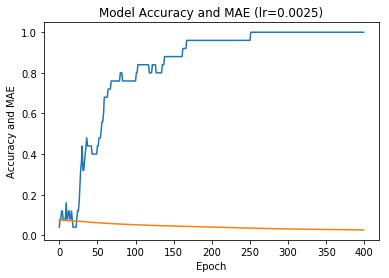

In [4]:
print('Best Model on iteration {} : Accuracy = {}, Loss = {}'.format(i, best_acc, worst_loss))

# Plot the MAE and the accuracy - let's look at convergence...
import matplotlib.pyplot as plt

plt.plot(metrics['acc'])
plt.plot(metrics['mae'])
plt.title('Model Accuracy and MAE (lr=0.0025)')
plt.ylabel('Accuracy and MAE')
plt.xlabel('Epoch')
plt.show()

We see from the plot, that we could have stopped the optimization at 300 epochs.  This is because we chose a good combination of learning rate lr and decay rate.

In [6]:
# summarize performance of the model.  Note that this should match the values above.
scores = model.evaluate(X, y, batch_size=batch_size, verbose=0)
model.reset_states()
print("Model Accuracy: %.2f%%" % (scores[1]*100))
# demonstrate some model predictions
seed = [char_to_int[alphabet[0]]]
for i in range(0, len(alphabet)-1):
	x = np.reshape(seed, (1, len(seed), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	print(int_to_char[seed[0]], "->", int_to_char[index])
	seed = [index]
model.reset_states()
# demonstrate a random starting point
letter = "K"
seed = [char_to_int[letter]]
print("New start: ", letter)
for i in range(0, 5):
	x = np.reshape(seed, (1, len(seed), 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	print(int_to_char[seed[0]], "->", int_to_char[index])
	seed = [index]
model.reset_states()

Model Accuracy: 100.00%
A -> B
B -> C
C -> D
D -> E
E -> F
F -> G
G -> H
H -> I
I -> J
J -> K
K -> L
L -> M
M -> N
N -> O
O -> P
P -> Q
Q -> R
R -> S
S -> T
T -> U
U -> V
V -> W
W -> X
X -> Y
Y -> Z
New start:  K
K -> B
B -> B
B -> C
C -> C
C -> C


While we can recognize the next letter in the sequential set, the training still is not doing all that well with an arbitrary start.  Really, we need to start looking at any length sequence of letters and training the LSTM to really "know" the alphabet.

### LSTM with Variable-Length Input to One-Char Output

In this section we explore a variation of the “stateless” LSTM that learns random subsequences of the alphabet and an effort to build a model that can be given arbitrary letters or subsequences of letters and predict the next letter in the alphabet.

First, change the framing of the problem. Define a maximum input sequence length and set it to a small value like 5 to speed up training. This defines the maximum length of subsequences of the alphabet will be drawn for training. In extensions, this could just as set to the full alphabet (26) or longer if we allow looping back to the start of the sequence.

We also need to define the number of random sequences to create for training.  Brownlee originally chose 1000 then after running the problem stated that we might need more sets to train on.  At 1500, we had great results.  What happens at 1000 with the tuning that we have in our optimization?

In [36]:
# LSTM with Variable Length Input Sequences to One Character Output
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K
import math

# fix random seed for reproducibility
np.random.seed(7)

# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

# prepare the dataset of input to output pairs encoded as integers
num_inputs = 1000
max_len = 5
dataX = []
dataY = []
for i in range(num_inputs):
    # Start randomly in the alphabet and end ramdomly 1-5 characters later.
    start = np.random.randint(len(alphabet)-2)
    end = np.random.randint(start, min(start+max_len,len(alphabet)-1))
    sequence_in = alphabet[start:end+1]
    sequence_out = alphabet[end + 1]
    dataX.append([char_to_int[char] for char in sequence_in])
    dataY.append(char_to_int[sequence_out])
    if i < 12:
        print(sequence_in, '->', sequence_out)

PQRST -> U
W -> X
O -> P
OPQ -> R
IJKLM -> N
QRSTU -> V
ABCD -> E
X -> Y
GHIJ -> K
M -> N
XY -> Z
QRST -> U


The input sequences vary in length between 1 and max_len and therefore require zero padding. Use left-hand-side (prefix) padding with the Keras built in pad_sequences() function.

In [37]:
# convert list of lists to array and pad sequences if needed
X = pad_sequences(dataX, maxlen=max_len, dtype='float32')

# reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], max_len, 1))

# normalize
X = X / float(len(alphabet))

# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# create and fit the model
batch_size = 1
number_epochs = 100

model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], 1)))
model.add(Dense(y.shape[1], activation='softmax'))

# Set the parameters to the ones that give good convergence.  Note that we use a golden ratio
# type reduction scheme to reduce the learning rate when we appear to diverge.
optimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Interestingly, adding 'mae' to the metrics really helps improve the stability.
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy', 'mae'])

**Close Control on Optimization**

Because Keras allows us to do one epoch or step at a time, we can really take control of the optimization to make it greedy as appropriate and then back off the learning rate as the problem converges.

This approach carefully monitors MAE, loss, and accuracy.  The approach is to start with a large learning rate (already set to 0.01), but when we diverge (actually don't converge) twice, we reduce the learning rate by the golden ratio.  We choose the golden ratio from some of the older literature having to do with line search.  However, this method seems to work.

We also set a stopping condition.  If we have already reached the minimum learning rate and are no longer converging ('non_convergence_conditions'), then stop.

Lastly, as before, always keep the best iteration.  Whatever that is, we will use it when finished.

In [38]:
# Note - we want to look at MAE, Loss, and Accuracy
metrics = {'acc':list(), 'loss':list(), 'mae':list()}

# Here we explicitely run each epoch and reset the state after every iteration.
best_acc = 0.0
worst_loss = worst_mae = math.inf
best_i = 0
first_divergent_i = False

minimum_learning_rate = 0.00001
# Change of loss over n steps, e.g., if abs(loss[i]-loss[i-3]) < 0.0001, stop.
non_convergence_conditions = [0.0001,3]

# Start the training iterations
for i in range(number_epochs):
    if i % 10 == 0:
        print('Iteration {}'.format(i))
    history = model.fit(X, y, epochs=1, batch_size=batch_size, verbose=2)

    metrics['acc'].append(history.history['acc'][0])
    metrics['loss'].append(history.history['loss'][0])
    metrics['mae'].append(history.history['mean_absolute_error'][0])
    
    # If the model has better accuracy and less loss and less mae, we consider it a better model
    if history.history['acc'][0] >= best_acc and history.history['loss'][0] <= worst_loss and \
       history.history['mean_absolute_error'][0] <= worst_mae:
        # Save it and update the best values.
        model.save_weights('tmp/weights.hdf5')
        best_acc = history.history['acc']
        worst_loss = history.history['loss']
        worst_mae = history.history['mean_absolute_error']
        best_i = i
    
    # Modify the learning rate if we take a second step in the wrong direction (greedy).
    current_lr = float(K.get_value(model.optimizer.lr))
    current_acc = round(metrics['acc'][len(metrics['acc'])-1],4)
    prev_acc = round(metrics['acc'][len(metrics['acc'])-2], 4)
    if i > 2 and current_acc <= prev_acc:
        if first_divergent_i is False:
            print('On step {}, did not have a convergent step'.format(i))
            first_divergent_i = True
        else:
            first_divergent_i = False
            new_lr = max(minimum_learning_rate, current_lr/1.6180339887498948482) # 1.6... is golden ratio
            K.set_value(model.optimizer.lr, new_lr)
            print('On step {} (2nd non-convergence), reduced lr from {} to {}'.format(i, current_lr, new_lr))
    
    # Check for what I term non-convergence.  That is, we have minimized the step as much as we want
    # and the loss just is not dropping anymore.
    if i > int(non_convergence_conditions[1]) and abs(current_lr - minimum_learning_rate) < 1.0e-12:
        last_index = len(metrics['loss'])-1
        prev_index = last_index - int(non_convergence_conditions[1])
        if abs(metrics['loss'][last_index] - metrics['loss'][prev_index]) < non_convergence_conditions[0]:
            print('Step {} - No longer converging.  Stopping iterations'.format(i))
            break
        
# When finished, load up the best model (weights)
model.load_weights('tmp/weights.hdf5')

Iteration 0
Epoch 1/1
 - 9s - loss: 2.7243 - acc: 0.1300 - mean_absolute_error: 0.0705
Epoch 1/1
 - 6s - loss: 1.9852 - acc: 0.2360 - mean_absolute_error: 0.0636
Epoch 1/1
Epoch 1/1
 - 7s - loss: 1.3985 - acc: 0.4320 - mean_absolute_error: 0.0533
Epoch 1/1
 - 6s - loss: 1.3117 - acc: 0.4640 - mean_absolute_error: 0.0508
Epoch 1/1
 - 6s - loss: 1.1921 - acc: 0.5160 - mean_absolute_error: 0.0477
Epoch 1/1
 - 6s - loss: 1.0761 - acc: 0.5640 - mean_absolute_error: 0.0440
Epoch 1/1
 - 7s - loss: 1.0486 - acc: 0.5880 - mean_absolute_error: 0.0422
Epoch 1/1
 - 8s - loss: 1.0233 - acc: 0.5800 - mean_absolute_error: 0.0414
On step 8, did not have a convergent step
Epoch 1/1
 - 7s - loss: 0.9443 - acc: 0.6250 - mean_absolute_error: 0.0385
Iteration 10
Epoch 1/1
 - 7s - loss: 0.8206 - acc: 0.6830 - mean_absolute_error: 0.0349
Epoch 1/1
 - 7s - loss: 0.8767 - acc: 0.6410 - mean_absolute_error: 0.0358
On step 11 (2nd non-convergence), reduced lr from 0.009999999776482582 to 0.006180339749357587
Epo

Reached (near)convergence on step 69 with loss=0.21629691293975445, accuracy=0.9753333333333334, and mae=0.010754402329143172


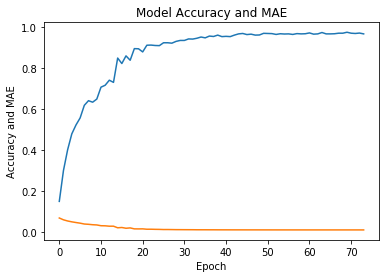

In [34]:
print('Reached (near)convergence on step {} with loss={}, accuracy={}, and mae={}'.format(best_i, metrics['loss'][best_i], \
                                                                                          metrics['acc'][best_i], \
                                                                                          metrics['mae'][best_i]))

# Plot the MAE and the accuracy - let's look at convergence...
import matplotlib.pyplot as plt

plt.plot(metrics['acc'])
plt.plot(metrics['mae'])
plt.title('Model Accuracy and MAE')
plt.ylabel('Accuracy and MAE')
plt.xlabel('Epoch')
plt.show()

In [35]:
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))

# demonstrate some model predictions
for i in range(20):
	pattern_index = np.random.randint(len(dataX))
	pattern = dataX[pattern_index]
	x = pad_sequences([pattern], maxlen=max_len, dtype='float32')
	x = np.reshape(x, (1, max_len, 1))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)

Model Accuracy: 97.53%
['E'] -> F
['G', 'H', 'I', 'J', 'K'] -> L
['D', 'E', 'F', 'G'] -> H
['T'] -> U
['R', 'S', 'T', 'U', 'V'] -> W
['H', 'I', 'J'] -> K
['J', 'K', 'L'] -> M
['C', 'D'] -> E
['C'] -> D
['H', 'I', 'J', 'K'] -> L
['O', 'P', 'Q'] -> R
['R', 'S', 'T'] -> U
['R', 'S', 'T'] -> U
['D', 'E', 'F', 'G'] -> H
['A', 'B', 'C', 'D', 'E'] -> F
['Q', 'R', 'S', 'T', 'U'] -> V
['W'] -> X
['K'] -> L
['X', 'Y'] -> Z
['V', 'W', 'X', 'Y'] -> Z


That is pretty awesome - we have taught a computer the ABCs.  Can we do something more useful like language translation?  Before answering that question with a worked example, let's capture programmatically our greedy optimization technique.

In [2]:
from keras import backend as K
import math

def greedy_optimizer(X, y, batch_size, model, number_epochs, minimum_learning_rate = 0.00001,
                     # Change of loss over n steps, e.g., if abs(loss[i]-loss[i-3]) < 0.0001, stop.
                     non_convergence_conditions = [0.0001, 3], validation_split=None,
                     # Note - we want to look at MAE, Loss, and Accuracy
                     metrics = {'acc':list(), 'loss':list(), 'mae':list()}
                    ):

    # Here we explicitely run each epoch and reset the state after every iteration.
    best_acc = 0.0
    worst_loss = worst_mae = math.inf
    best_i = 0
    first_divergent_i = False

    # Start the training iterations
    for i in range(number_epochs):
        if i % 10 == 0:
            print('Iteration {} of {}'.format(i, number_epochs))
        history = model.fit(X, y, epochs=1, batch_size=batch_size, verbose=2,
                            validation_split=validation_split)

        metrics['acc'].append(history.history['acc'][0])
        metrics['loss'].append(history.history['loss'][0])
        metrics['mae'].append(history.history['mean_absolute_error'][0])
    
        # If the model has better accuracy and less loss and less mae, we consider it a better model
        if history.history['acc'][0] >= best_acc and history.history['loss'][0] <= worst_loss and \
           history.history['mean_absolute_error'][0] <= worst_mae:
            # Save it and update the best values.
            model.save_weights('tmp/wkweights.hdf5')
            best_acc = history.history['acc']
            worst_loss = history.history['loss']
            worst_mae = history.history['mean_absolute_error']
            best_i = i
    
        # Modify the learning rate if we take a second step in the wrong direction (greedy).
        current_lr = float(K.get_value(model.optimizer.lr))
        current_acc = round(metrics['acc'][len(metrics['acc'])-1],4)
        prev_acc = round(metrics['acc'][len(metrics['acc'])-2], 4)
        if i > 2 and current_acc <= prev_acc:
            if first_divergent_i is False:
                print('On step {}, did not have a convergent step'.format(i))
                first_divergent_i = True
            else:
                first_divergent_i = False
                new_lr = max(minimum_learning_rate, current_lr/1.6180339887498948482) # 1.6... is golden ratio
                K.set_value(model.optimizer.lr, new_lr)
                print('On step {} (2nd non-convergence), reduced lr from {} to {}'.format(i, current_lr, new_lr))
    
        # Check for what I term non-convergence.  That is, we have minimized the step as much as we want
        # and the loss just is not dropping anymore.
        if i > int(non_convergence_conditions[1]) and abs(current_lr - minimum_learning_rate) < 1.0e-12:
            last_index = len(metrics['loss'])-1
            prev_index = last_index - int(non_convergence_conditions[1])
            if abs(metrics['loss'][last_index] - metrics['loss'][prev_index]) < non_convergence_conditions[0]:
                print('Step {} - No longer converging.  Stopping iterations'.format(i))
                break
        
    # When finished, load up the best model (weights)
    model.load_weights('tmp/wkweights.hdf5')
    return model
    

Using TensorFlow backend.


# LSTM in an RNN

A network of LSTMs may be used to create an RNN.  One usage of an RNN using LSTMs is to build a network that can do language translation.  There is an awesome site at http://www.manythings.org/anki/ which provides many English / another language translation word pairs such that we can try a couple different of languages and see how this network runs.

The method is outlined in [Learning Phrase Representations using RNN Encoder-Decoder for Statistical Machine Translation](https://arxiv.org/abs/1406.1078).  Pretending we are doing a great commercial set of translators, we will create a method to download the file from the site and store the trained weights.

## Sequence to Sequence Learning

Sequence to sequence learning (Seq2Seq) trains models to convert sequences from one domain (e.g. sentences in English) to sequences in another domain (e.g. the same sentences translated to French).  Seq2Seq was introduced by [Sutskever et al](https://papers.nips.cc/paper/5346-sequence-to-sequence-learning-with-neural-networks.pdf) in 2015.  Seq2Seq can be implemented using RNNs or [1-D convnets](https://datawarrior.wordpress.com/2017/05/11/convnet-seq2seq-for-machine-translation/).

### The Trivial Case

The trivial case is when the input and output sequences are of the same length.  For example, we could use an RNN, LSTM or [GRU](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781787128422/6/ch06lvl1sec44/gated-recurrent-unit--gru) to develop network to add numbers as characters, e.g., ```345+452``` is equal to ```0000797```.  For example, in the [script](https://github.com/keras-team/keras/blob/master/examples/addition_rnn.py), a model is constructed which is very similar to those we built for learning the alphabet.

```python
model = Sequential()
# "Encode" the input sequence using an RNN, producing an output of HIDDEN_SIZE.
# Note: In a situation where your input sequences have a variable length,
# use input_shape=(None, num_feature).
model.add(RNN(HIDDEN_SIZE, input_shape=(MAXLEN, len(chars))))
# As the decoder RNN's input, repeatedly provide with the last hidden state of
# RNN for each time step. Repeat 'DIGITS + 1' times as that's the maximum
# length of output, e.g., when DIGITS=3, max output is 999+999=1998.
model.add(layers.RepeatVector(DIGITS + 1))
# The decoder RNN could be multiple layers stacked or a single layer.
for _ in range(LAYERS):
    # By setting return_sequences to True, return not only the last output but
    # all the outputs so far in the form of (num_samples, timesteps,
    # output_dim). This is necessary as TimeDistributed in the below expects
    # the first dimension to be the timesteps.
    model.add(RNN(HIDDEN_SIZE, return_sequences=True))

# Apply a dense layer to the every temporal slice of an input. For each of step
# of the output sequence, decide which character should be chosen.
model.add(layers.TimeDistributed(layers.Dense(len(chars))))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
```

### In General - Canonical sequence-to-sequence (Seq2Seq)



## Summary of the Algorithm
Start with input sequences from a domain (e.g. English sentences) and corresponding target sequences from another domain (e.g. French sentences).  In our case, we have modified the original algorithm presented at [github](https://github.com/keras-team/keras/blob/master/examples/lstm_seq2seq.py) such that we can just fill in a dictionary to create the necessary model data for any language and create the model on the fly.

In a nutshell:
1. Get and prepare the training data into training sequences.  Specifically,
Turn the sentences into 3 Numpy arrays, encoder_input_data, decoder_input_data, decoder_target_data:
encoder_input_data is a 3D array of shape (num_pairs, max_english_sentence_length, num_english_characters) containing a one-hot vectorization of the English sentences.
decoder_input_data is a 3D array of shape (num_pairs, max_french_sentence_length, num_french_characters) containg a one-hot vectorization of the French sentences.
decoder_target_data is the same as decoder_input_data but offset by one timestep. decoder_target_data[:, t, :] will be the same as decoder_input_data[:, t + 1, :].

2. An encoder LSTM turns input sequences to 2 state vectors (we keep the last LSTM state and discard the outputs).

3. A decoder LSTM is trained to turn the target sequences into the same sequence but offset by one timestep in the future, a training process called "teacher forcing" in this context. Is uses as initial state the state vectors from the encoder. Effectively, the decoder learns to generate `targets[t+1...]` given `targets[...t]`, conditioned on the input sequence.
4. In inference mode, when we want to decode unknown input sequences, we:
    * Encode the input sequence into state vectors
    * Start with a target sequence of size 1 (just the start-of-sequence character)
    * Feed the state vectors and 1-char target sequence to the decoder to produce predictions for the next character
    * Sample the next character using these predictions (we simply use argmax).
    * Append the sampled character to the target sequence
    * Repeat until we generate the end-of-sequence character or we hit the character limit.

In [3]:
from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras import optimizers
import numpy as np
from pathlib import Path
import requests, zipfile, io

Let's create a dictionary of languages to try.  I note that we have adopted this code from [github](https://github.com/keras-team/keras/blob/master/examples/lstm_seq2seq.py) which is covered by a [Keras blog](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html).

In [4]:
languages = {
    'french':{
        'batch_size':64,     # Batch size for training.
        'epochs':100,        # Number of epochs to train for.
        'latent_dim':256,    # Latent dimensionality of the encoding space.
        'num_samples':10000, # Number of samples to train on.
        'datas_path':'http://www.manythings.org/anki/',
        'lang_file':'fra-eng.zip', # Path to the zip file
        'lang_txt_file':'fra.txt', # The actual text file
        'weight_file':'tmp/languages/french_weights.hd5' # Weights from training.
    },
    'spanish':{
        'batch_size':64,
        'epochs':100,
        'latent_dim':256,
        'num_samples':10000,
        'datas_path':'http://www.manythings.org/anki/',
        'lang_file':'spa-eng.zip', # Path to the zip file
        'lang_txt_file':'spa.txt', # The actual text file
        'weight_file':'tmp/languages/spanish_weights.hd5' # Weights from training.
    },
    'german':{
        'batch_size':64,
        'epochs':100,
        'latent_dim':256,
        'num_samples':10000,
        'datas_path':'http://www.manythings.org/anki/',
        'lang_file':'deu-eng.zip', # Path to the zip file
        'lang_txt_file':'deu.txt', # The actual text file
        'weight_file':'tmp/languages/german_weights.hd5' # Weights from training.
    },
    'russian':{
        'batch_size':64,
        'epochs':100,
        'latent_dim':256,
        'num_samples':10000,
        'datas_path':'http://www.manythings.org/anki/',
        'lang_file':'rus-eng.zip', # Path to the zip file
        'lang_txt_file':'rus.txt', # The actual text file
        'weight_file':'tmp/languages/russian_weights.hd5' # Weights from training.
    }
}

The function to create an RNN for machine translation of English to some desired language.

In [5]:
def translate(language):
  
    batch_size = language['batch_size']  # Batch size for training.
    epochs = language['epochs']          # Number of epochs to train for.
    latent_dim = language['latent_dim']  # Latent dimensionality of the encoding space.
    num_samples = language['num_samples']  # Number of samples to train on.
    directory_path = language['datas_path']
    language_file = language['lang_file']
    text_file = "tmp/languages/{}".format(language['lang_txt_file'])
    weight_path = language['weight_file']

    # Vectorize the data.
    input_texts = []
    target_texts = []
    input_characters = set()
    target_characters = set()

    # Get, unzip, and read the language training file
    # Before downloading, let's see if we already got the file
    local_lang_txt = Path(text_file)
    if local_lang_txt.is_file() is False:
        print('Downloading language file {}'.format(language_file))
        url = '{}{}'.format(directory_path, language_file)
        r = requests.get(url, stream=True)
        if r.ok:
            print('Successfully downloaded file {}'.format(url))
            z = zipfile.ZipFile(io.BytesIO(r.content))
            z.extractall('tmp/languages')
        else:
            print('FATAL: Cannot retrieve language file {}'.format(url))

    else:
        print('Language file {} found'.format(local_lang_txt))

    # Read that text file into the vector...
    with open(local_lang_txt, 'r', encoding='utf-8') as f:
        lines = f.read().split('\n')
    for line in lines[: min(num_samples, len(lines) - 1)]:
        input_text, target_text = line.split('\t')
        # We use "tab" as the "start sequence" character
        # for the targets, and "\n" as "end sequence" character.
        target_text = '\t' + target_text + '\n'
        input_texts.append(input_text)
        target_texts.append(target_text)
        for char in input_text:
            if char not in input_characters:
                input_characters.add(char)
        for char in target_text:
            if char not in target_characters:
                target_characters.add(char)

    input_characters = sorted(list(input_characters))
    target_characters = sorted(list(target_characters))
    num_encoder_tokens = len(input_characters)
    num_decoder_tokens = len(target_characters)
    max_encoder_seq_length = max([len(txt) for txt in input_texts])
    max_decoder_seq_length = max([len(txt) for txt in target_texts])

    print('Number of samples:', len(input_texts))
    print('Number of unique input tokens:', num_encoder_tokens)
    print('Number of unique output tokens:', num_decoder_tokens)
    print('Max sequence length for inputs:', max_encoder_seq_length)
    print('Max sequence length for outputs:', max_decoder_seq_length)

    input_token_index = dict(
        [(char, i) for i, char in enumerate(input_characters)])
    target_token_index = dict(
        [(char, i) for i, char in enumerate(target_characters)])

    encoder_input_data = np.zeros(
        (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
        dtype='float32')
    decoder_input_data = np.zeros(
        (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
        dtype='float32')
    decoder_target_data = np.zeros(
        (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
        dtype='float32')

    for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
        for t, char in enumerate(input_text):
            encoder_input_data[i, t, input_token_index[char]] = 1.
        for t, char in enumerate(target_text):
            # decoder_target_data is ahead of decoder_input_data by one timestep
            decoder_input_data[i, t, target_token_index[char]] = 1.
            if t > 0:
                # decoder_target_data will be ahead by one timestep
                # and will not include the start character.
                decoder_target_data[i, t - 1, target_token_index[char]] = 1.

    # Define an input sequence and process it.
    encoder_inputs = Input(shape=(None, num_encoder_tokens))
    encoder = LSTM(latent_dim, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    # We discard `encoder_outputs` and only keep the states.
    encoder_states = [state_h, state_c]

    # Set up the decoder, using `encoder_states` as initial state.
    decoder_inputs = Input(shape=(None, num_decoder_tokens))
    # We set up our decoder to return full output sequences,
    # and to return internal states as well. We don't use the
    # return states in the training model, but we will use them in inference.
    decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                         initial_state=encoder_states)
    decoder_dense = Dense(num_decoder_tokens, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    # Define the model that will turn
    # `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    # Base optimizer is RMSprop. As we have coded up our greedy version,
    # we can now use RMSprop in a 'greedy environment'.
    optimizer = optimizers.RMSprop(lr=0.025)

    # Run training.  Have to set the metrics to use the greedy function.
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                  metrics=['accuracy', 'mae'])

    # It takes a long time to train, so if we have the
    # weights, we won't be training
    weight_file = Path(weight_path)
    if weight_file.is_file() is False:

        # We don't have weights - in this case we call the greedy optimizer to generate
        # the weight files.  Even at that, it still takes hours and hours to generate
        # the weights.
        model = greedy_optimizer([encoder_input_data, decoder_input_data], decoder_target_data, batch_size,
                                 model, number_epochs=epochs, validation_split=0.02
                                )

        # Save the model - we use this for deos.
        model.save(weight_path)

    else:   
        # Load the existing weight model for the language we are working on.
        print("Loading model with saved weights from {}".format(weight_path))
        model.load_weights(weight_path)

    # Next: inference mode (sampling).
    # Here's the drill:
    # 1) encode input and retrieve initial decoder state
    # 2) run one step of decoder with this initial state
    # and a "start of sequence" token as target.
    # Output will be the next target token
    # 3) Repeat with the current target token and current states

    # Define sampling models
    encoder_model = Model(encoder_inputs, encoder_states)

    decoder_state_input_h = Input(shape=(latent_dim,))
    decoder_state_input_c = Input(shape=(latent_dim,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(
        decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model(
        [decoder_inputs] + decoder_states_inputs,
        [decoder_outputs] + decoder_states)

    # Reverse-lookup token index to decode sequences back to
    # something readable.
    reverse_input_char_index = dict(
        (i, char) for char, i in input_token_index.items())
    reverse_target_char_index = dict(
        (i, char) for char, i in target_token_index.items())


    def decode_sequence(input_seq):
        # Encode the input as state vectors.
        states_value = encoder_model.predict(input_seq)

        # Generate empty target sequence of length 1.
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        # Populate the first character of target sequence with the start character.
        target_seq[0, 0, target_token_index['\t']] = 1.

        # Sampling loop for a batch of sequences
        # (to simplify, here we assume a batch of size 1).
        stop_condition = False
        decoded_sentence = ''
        while not stop_condition:
            output_tokens, h, c = decoder_model.predict(
                [target_seq] + states_value)

            # Sample a token
            sampled_token_index = np.argmax(output_tokens[0, -1, :])
            sampled_char = reverse_target_char_index[sampled_token_index]
            decoded_sentence += sampled_char

            # Exit condition: either hit max length
            # or find stop character.
            if (sampled_char == '\n' or
               len(decoded_sentence) > max_decoder_seq_length):
                stop_condition = True

            # Update the target sequence (of length 1).
            target_seq = np.zeros((1, 1, num_decoder_tokens))
            target_seq[0, 0, sampled_token_index] = 1.

            # Update states
            states_value = [h, c]

        return decoded_sentence


    print("_______________________________________________________________")
    for seq_index in range(100):
        # Take one sequence (part of the training set)
        # for trying out decoding.
        input_seq = encoder_input_data[seq_index: seq_index + 1]
        decoded_sentence = decode_sequence(input_seq)
        print('-')
        print('Input sentence:', input_texts[seq_index])
        print('Decoded sentence:', decoded_sentence)
        
    return model, encoder_model, decoder_model

In [183]:
french_model, encoder_model, decoder_model = translate(languages['french'])

Language file tmp/languages/fra.txt found
Number of samples: 10000
Number of unique input tokens: 71
Number of unique output tokens: 94
Max sequence length for inputs: 16
Max sequence length for outputs: 59
Loading model with saved weights from tmp/languages/french_weights.hd5
_______________________________________________________________
-
Input sentence: Go.
Decoded sentence: Divrais-je en mesure de nous voir ?

-
Input sentence: Run!
Decoded sentence: Prenez vos jambes à votre cou !

-
Input sentence: Run!
Decoded sentence: Prenez vos jambes à votre cou !

-
Input sentence: Wow!
Decoded sentence: Il va bien.

-
Input sentence: Fire!
Decoded sentence: Prena travaille.

-
Input sentence: Help!
Decoded sentence: Aidez-nous, je vous prie !

-
Input sentence: Jump.
Decoded sentence: Fais-le donc !

-
Input sentence: Stop!
Decoded sentence: Arrête de te quereller !

-
Input sentence: Stop!
Decoded sentence: Arrête de te quereller !

-
Input sentence: Stop!
Decoded sentence: Arrête de te 

In [186]:
french_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_47 (InputLayer)           (None, None, 71)     0                                            
__________________________________________________________________________________________________
input_48 (InputLayer)           (None, None, 94)     0                                            
__________________________________________________________________________________________________
lstm_33 (LSTM)                  [(None, 256), (None, 335872      input_47[0][0]                   
__________________________________________________________________________________________________
lstm_34 (LSTM)                  [(None, None, 256),  359424      input_48[0][0]                   
                                                                 lstm_33[0][1]                    
          

In [187]:
encoder_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        (None, None, 71)          0         
_________________________________________________________________
lstm_33 (LSTM)               [(None, 256), (None, 256) 335872    
Total params: 335,872
Trainable params: 335,872
Non-trainable params: 0
_________________________________________________________________


In [188]:
decoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_48 (InputLayer)           (None, None, 94)     0                                            
__________________________________________________________________________________________________
input_49 (InputLayer)           (None, 256)          0                                            
__________________________________________________________________________________________________
input_50 (InputLayer)           (None, 256)          0                                            
__________________________________________________________________________________________________
lstm_34 (LSTM)                  [(None, None, 256),  359424      input_48[0][0]                   
                                                                 input_49[0][0]                   
          

In [191]:
spanish_model, _, _ = translate(languages['spanish'])

Language file tmp/languages/spa.txt found
Number of samples: 10000
Number of unique input tokens: 71
Number of unique output tokens: 86
Max sequence length for inputs: 17
Max sequence length for outputs: 42
Loading model with saved weights from tmp/languages/spanish_weights.hd5
_______________________________________________________________
-
Input sentence: Go.
Decoded sentence: Vete.

-
Input sentence: Go.
Decoded sentence: Vete.

-
Input sentence: Go.
Decoded sentence: Vete.

-
Input sentence: Hi.
Decoded sentence: Hola.

-
Input sentence: Run!
Decoded sentence: ¡Corre!

-
Input sentence: Who?
Decoded sentence: ¿Quién?

-
Input sentence: Wow!
Decoded sentence: ¡Órale!

-
Input sentence: Fire!
Decoded sentence: ¡Fuego!

-
Input sentence: Fire!
Decoded sentence: ¡Fuego!

-
Input sentence: Fire!
Decoded sentence: ¡Fuego!

-
Input sentence: Help!
Decoded sentence: Ayúdame.

-
Input sentence: Help!
Decoded sentence: Ayúdame.

-
Input sentence: Help!
Decoded sentence: Ayúdame.

-
Input se

In [202]:
german_model, _, _ = translate(languages['german'])

Language file tmp/languages/deu.txt found
Number of samples: 10000
Number of unique input tokens: 69
Number of unique output tokens: 85
Max sequence length for inputs: 16
Max sequence length for outputs: 74
Loading model with saved weights from tmp/languages/german_weights.hd5
_______________________________________________________________
-
Input sentence: Hi.
Decoded sentence: Hallo!

-
Input sentence: Hi.
Decoded sentence: Hallo!

-
Input sentence: Run!
Decoded sentence: Schauen Sie auf zu schießen.

-
Input sentence: Wow!
Decoded sentence: Stirb mal Grünzen Sie auf.

-
Input sentence: Wow!
Decoded sentence: Stirb mal Grünzen Sie auf.

-
Input sentence: Fire!
Decoded sentence: Feuer!

-
Input sentence: Help!
Decoded sentence: Hilf mir.

-
Input sentence: Help!
Decoded sentence: Hilf mir.

-
Input sentence: Stop!
Decoded sentence: Hör auf zu schreien!

-
Input sentence: Wait!
Decoded sentence: Warte mal kurz!

-
Input sentence: Hello!
Decoded sentence: Hallo, Tom.

-
Input sentence: 

In [6]:
russian_model, _, _ = translate(languages['russian'])

Successfully downloaded file http://www.manythings.org/anki/rus-eng.zip
Number of samples: 10000
Number of unique input tokens: 72
Number of unique output tokens: 91
Max sequence length for inputs: 14
Max sequence length for outputs: 40
Iteration 0 of 100
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 260s - loss: 0.9100 - acc: 0.1343 - mean_absolute_error: 0.0131 - val_loss: 0.8519 - val_acc: 0.1857 - val_mean_absolute_error: 0.0125
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 238s - loss: 0.5688 - acc: 0.2113 - mean_absolute_error: 0.0115 - val_loss: 0.7159 - val_acc: 0.2367 - val_mean_absolute_error: 0.0117
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 240s - loss: 0.4642 - acc: 0.2409 - mean_absolute_error: 0.0107 - val_loss: 0.6845 - val_acc: 0.2480 - val_mean_absolute_error: 0.0113
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 224s - loss: 0.4159 - acc: 0.2536 - mean_absolute_error: 0.0104 - val_loss: 0.6438 - val_acc: 0.262

Iteration 40 of 100
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 195s - loss: 0.1878 - acc: 0.3184 - mean_absolute_error: 0.0086 - val_loss: 0.6909 - val_acc: 0.2951 - val_mean_absolute_error: 0.0098
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 196s - loss: 0.1862 - acc: 0.3189 - mean_absolute_error: 0.0086 - val_loss: 0.7324 - val_acc: 0.2951 - val_mean_absolute_error: 0.0098
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 198s - loss: 0.1856 - acc: 0.3188 - mean_absolute_error: 0.0086 - val_loss: 0.7076 - val_acc: 0.2952 - val_mean_absolute_error: 0.0098
On step 42, did not have a convergent step
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 193s - loss: 0.1840 - acc: 0.3193 - mean_absolute_error: 0.0086 - val_loss: 0.7147 - val_acc: 0.2970 - val_mean_absolute_error: 0.0098
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 208s - loss: 0.1834 - acc: 0.3198 - mean_absolute_error: 0.0086 - val_loss: 0.7089 - val_acc: 0.2

 - 209s - loss: 0.1146 - acc: 0.3369 - mean_absolute_error: 0.0080 - val_loss: 0.9540 - val_acc: 0.2925 - val_mean_absolute_error: 0.0097
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 209s - loss: 0.1138 - acc: 0.3372 - mean_absolute_error: 0.0080 - val_loss: 0.9597 - val_acc: 0.2909 - val_mean_absolute_error: 0.0097
Iteration 80 of 100
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 226s - loss: 0.1134 - acc: 0.3373 - mean_absolute_error: 0.0080 - val_loss: 0.9569 - val_acc: 0.2926 - val_mean_absolute_error: 0.0097
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 213s - loss: 0.1130 - acc: 0.3374 - mean_absolute_error: 0.0080 - val_loss: 0.9645 - val_acc: 0.2908 - val_mean_absolute_error: 0.0098
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 207s - loss: 0.1126 - acc: 0.3375 - mean_absolute_error: 0.0080 - val_loss: 0.9693 - val_acc: 0.2910 - val_mean_absolute_error: 0.0098
Train on 9800 samples, validate on 200 samples
Epoch 1/1
 - 21

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/keras/engine/topology.py:2364: UserWarning: Layer lstm_2 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_1/while/Exit_2:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'lstm_1/while/Exit_3:0' shape=(?, 256) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


_______________________________________________________________
-
Input sentence: Go.
Decoded sentence: Идите сейчас.

-
Input sentence: Go.
Decoded sentence: Идите сейчас.

-
Input sentence: Hi.
Decoded sentence: Здрасте.

-
Input sentence: Hi.
Decoded sentence: Здрасте.

-
Input sentence: Hi.
Decoded sentence: Здрасте.

-
Input sentence: Hi.
Decoded sentence: Здрасте.

-
Input sentence: Hi.
Decoded sentence: Здрасте.

-
Input sentence: Run!
Decoded sentence: Бегите!

-
Input sentence: Run!
Decoded sentence: Бегите!

-
Input sentence: Run.
Decoded sentence: Бегите!

-
Input sentence: Run.
Decoded sentence: Бегите!

-
Input sentence: Who?
Decoded sentence: Кто тебе сказал?

-
Input sentence: Wow!
Decoded sentence: Вот это да!

-
Input sentence: Wow!
Decoded sentence: Вот это да!

-
Input sentence: Wow!
Decoded sentence: Вот это да!

-
Input sentence: Wow!
Decoded sentence: Вот это да!

-
Input sentence: Wow!
Decoded sentence: Вот это да!

-
Input sentence: Wow!
Decoded sentence: Вот эт

An interesting question - can we tell similarity of languages by weight patterns?  If so, Spanish and French will be more similar than with other languages.

In [201]:
np.set_printoptions(precision=4)

fw_larr = french_model.get_weights()

for arr in fw_larr:
    print(arr)

[[ -1.0503e+00  -8.3374e-01  -8.7131e-01 ...,  -7.7995e-01  -2.0009e-01
   -5.5296e-01]
 [  3.7340e-02   1.1915e-01   1.9764e-01 ...,  -1.1331e+00  -3.7083e-01
   -1.6986e-01]
 [  4.9896e-03  -4.1231e-02  -4.9719e-02 ...,   4.7060e-02  -3.2271e-02
   -3.7802e-04]
 ..., 
 [  1.0704e-01  -1.3072e-01   7.4463e-01 ...,  -2.3481e+00  -2.0706e+00
   -1.5693e+00]
 [  1.9736e-01  -1.1157e-02   8.8278e-02 ...,   1.1215e-01  -1.3129e-02
    1.1559e-01]
 [  4.6210e-01  -9.4595e-02   8.5379e-02 ...,  -2.7838e-01   3.3167e-01
    1.7585e-01]]
[[-0.8194 -0.0117  0.2343 ...,  0.7626  0.9406 -0.0624]
 [-0.6    -0.046  -0.042  ..., -1.3795  0.5039 -0.8089]
 [ 0.3094  1.808  -0.5267 ...,  0.3552 -0.478  -0.2018]
 ..., 
 [-1.6392 -0.4398 -1.6586 ..., -0.0406 -0.1637  0.6896]
 [ 0.4509  0.5202  1.1556 ..., -0.1937  1.9012  0.8856]
 [ 2.1952  0.0353  0.4069 ...,  0.7803 -0.4042 -0.8309]]
[-2.3298 -3.1635 -3.5883 ..., -2.9776 -1.9327 -2.7946]
[[  4.5677e-01  -3.4324e-01   2.3304e-01 ...,  -6.6434e-02  -2.11